## La libreria Numpy 

El nombre **numoy** vienen de _Numerical Python_. Es una librería de software libre que permite a Python trabajar con vectores y matrices de forma muy oficiente. Entro otras cosas, el almacenamiento y el acceso es muy rápido, y permite operaciones vectorizadas, acceso por nomemclarura de slices y selección mediante vectores booleanos.

### Instalar numpy

Se puede instalar con pip

In [10]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


A la hora de importar numpy es muy normal, como con matplotlib, usar la siguiente forma abreviada:
    

In [11]:
import numpy as np

### Arrays en numpy

Una de las razones para la mejor optimización de numpy se consigue porque los array solo adminten un determinado tipo de datos, no son tan versátiles como las listas o conjuntos de Python, que aceptan cualquier clase de elemento. Además, el tipo de dato esta definido muy rigurosamente. Podemos definir el tipo cuando creamos el array o dejar que numpy lo infiera a partir de los datos que le damos. Si son todo enteros, por ejemplo, seguramante creará un array de _enteros de 64 bits_.

Podemos crear un array a partir de cualquier secuencia homogenea de valores Pytho usando la función `array`. Es muy habitual usar una lista:

In [12]:
import numpy as np

a = np.array([1, 2, 3, 4])
print(a)

[1 2 3 4]


Pro vale cualquier secuencia:

In [13]:
import numpy as np

a = np.array(range(24))
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


Podemos crear una matriz usando una lista de listas:

In [14]:
import numpy as np

b = np.array([
    [1, 1.1, 1.2, 1.3],
    [2, 2.1, 2.2, 2.3],
    [3, 3.1, 3.2, 3.3],
])
print(b)

[[1.  1.1 1.2 1.3]
 [2.  2.1 2.2 2.3]
 [3.  3.1 3.2 3.3]]


Los arrays tienen un atributo que define su tipo, `dtype` y otro que define su forma: `shape`:

In [16]:
import numpy as np

b = np.array([
    [1, 1.1, 1.2, 1.3],
    [2, 2.1, 2.2, 2.3],
    [3, 3.1, 3.2, 3.3],
])

b.shape

(3, 4)

In [17]:
import numpy as np

b = np.array([
    [1, 1.1, 1.2, 1.3],
    [2, 2.1, 2.2, 2.3],
    [3, 3.1, 3.2, 3.3],
])

b.dtype

dtype('float64')

Podemos usar el método `reshape` para cambiar las dimensiones de una array; esto puede ser útil para crear arrays grandes a partir de una secuencia lineal:

In [18]:
import numpy as np

b = np.array(range(16)).reshape((4, 4))
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

**Nota** : Obsérvese que el parámetro que se le pasa a `reshape` es una tupla.

Una forma muy eficiente de crear matrices es la función `zeros` para crear vectores o matrices con todos los valores a cero:

In [19]:
import numpy as np

z = np.zeros((4,4))
z

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

La función `eye` permite crear una matrix cuadrada con la diagonal a 1 y el resto de valores a 0. Solo hay que pasarle un dato, ya que al ser ciadrada el número de columnas es igual el de filas.

In [20]:
import numpy as np

i = np.eye(4)
print(i)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


También tenemos la función `arange`, que funciona como el range normal, pero vectorizado (Veremos que significa esto más adelante):

In [21]:
import numpy as np

np.arange(36)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [22]:
import numpy as np

np.arange(1, 11, 2)

array([1, 3, 5, 7, 9])

In [23]:
import numpy as np

np.arange(36).reshape((6,6))

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

La función `linspace` es similar a range, pero en vez de aceptar como tercer parámetro un paso, se le indica el número de valores que queremos en ese intervalo, y el último valor indicado tamnbién está dentro del rango:

In [24]:
import numpy as np

np.linspace(2, 9, 20)

array([2.        , 2.36842105, 2.73684211, 3.10526316, 3.47368421,
       3.84210526, 4.21052632, 4.57894737, 4.94736842, 5.31578947,
       5.68421053, 6.05263158, 6.42105263, 6.78947368, 7.15789474,
       7.52631579, 7.89473684, 8.26315789, 8.63157895, 9.        ])

### Algunas ventajas de los arrays de numpy

#### Operaciones vectorizadas

Una operación vectoriada es una una técnica que consiste en aplicar una misma operación a un array (o a parte de un array) sin necesidad de especificar bucles. Como este se implementean en  C y tiene acceso inmediato a los datos el rendimiento se eleva en varios ordenes de magnitud. Además, el código resultante es más corto y se entiende mejor.

Por ejemplo, vamos a calcular lo que lleva calcular el cubo de una serie de números, haciendlo nativamente en Python o usando Nunpy:

Primero sin numpy.

In [34]:
%%timeit

import random

n1 = (random.random() for i in range(10000000))
c1 = [x**3 for x in n1]

2.24 s ± 44.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Usando numpy, podemos usar `numpy.random.rand` para crear el array, y luego simplemente lo elevamos al cubo:

In [35]:
%%timeit

import numpy as np

n2 = np.random.rand(10000000)
c2 = n2 ** 3

279 ms ± 3.21 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


En resumen: Siempre que puedas, usa operaciones vectorizables. Si estás trabajando con arrays de numpy y estas haciendo un for en algún lado, estás haciendo algo mal.

#### Selección booleana

Podemos hacer un filtrado de filas dentro de un array de numpy usando un vector de booleanos; las filas en las que haya un verdadero en el la posicción del vector booleano equivalente pasan el filtro. En caso contrario no. Mejor vamoslo con un ejemplo:

Podemos crear un array de numpy a partir de la función `array`, pasándole cualquier secuencia. Es muy habitual usar una lista:

In [37]:
a = np.array([1,2,3,4])
print(a)

[1 2 3 4]


Si queremos quedarnos solo con la primera y tercera columnas, podemos filtrar usando un vector de booleanos:

In [40]:
f = np.array([True, False, True, False])
print(a[f])

[1 3]


Lo que es interensate es que podemos obtener este tipo de vectores haciendo comparaciones entre arrays. Por ejemplo, supongamos que tennemos el siguiente array:

In [41]:
l = np.array([-23, 144, 85, 36, -2, 0, 7, 92])

Podemos hacer la siguiente comparación: `f < 0`. En principio esta comparación no tiene ninguna lógica; estamos comparando un array de valores con un solo número. Y es verdad que con listas nativas de Python no tienen sentido, de hecho, daria un error.

pero las clases que implementan los array usan una técnica de OOP llamada **sobrecarga de operadores**, es decir, que redefinen el comportamiento y los resultados cuando se opera con los arrays. En este caso, al comparar con un valor escalar, aplica esa comparación de forma vectorizada a todos los valores del array, y devuelve un array con los resultados:

**Ejercicio**: Intenta comparar una lista de numeros con un solo numero. Por ejemplo:

In [46]:
# [1, 2, 3] > 2

**Ejercicio**: frealiza una comparacion similar, pero usando arrays de numpy:

In [47]:
import numpy as np

l = np.array([1, 2, 3])
l > 2

array([False, False,  True])

Usando  este vector de booleanos como filtro, puedo obtener un array que es un sobconjunto de las filas de l, en el que las filas solo tienen valores positivos:

In [52]:
import numpy as np

l = np.array([-12, 23, 31, -100, 4, 754, 0, 63, 0, 2])

print('Menores que 0:', l[l<0])
print('Mayores que 0:', l[l > 0])
print('Igual que 0:', l[l == 0])
print('Pares:', l[l % 2 == 0])
print('Impares:', l[l % 2 == 1])

Menores que 0: [ -12 -100]
Mayores que 0: [ 23  31   4 754  63   2]
Igual que 0: [0 0]
Pares: [ -12 -100    4  754    0    0    2]
Impares: [23 31 63]


#### Slices

Los arrays de numpy también se puede operar com slices, como las listas o las cadenas de texto.

Los elementos de una matriz bidimensional se pueden acceder de
dos maneras:

- usando `[fila][columna]` 
- usando `[fila, columna]`

In [25]:
import numpy as np

m = np.arange(1, 17).reshape((4, 4))
assert list(m[1]) == [5, 6, 7, 8]
assert m[1][3] == m[1,3] == 8
m

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

**Ejercicio**: Usando arrays de numpy y natplotlib, representar la grafica de la ecuacion

$$ y = sin(x)  $$

Entre los valores 0 y 5

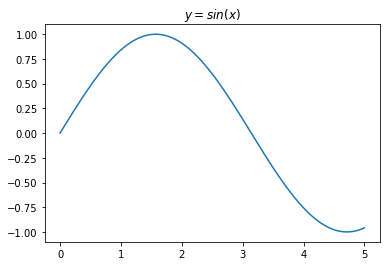

In [59]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x = np.linspace(0, 5, 200)
y = np.sin(x)
plt.title("$y = sin(x)$")
plt.plot(x, y)